# Tratamento do datasets

In [416]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('darkgrid')

%matplotlib inline

In [417]:
confirmbr = pd.read_csv('https://raw.githubusercontent.com/elhenrico/covid19-Brazil-timeseries/master/confirmed-cases.csv')

deathsbr = pd.read_csv('https://raw.githubusercontent.com/elhenrico/covid19-Brazil-timeseries/master/deaths.csv')

In [418]:
confirmbr['Cidade'] = confirmbr['Unnamed: 0']
confirmbr['Estado'] = confirmbr['Unnamed: 1']

deathsbr['Cidade'] = deathsbr['Unnamed: 0']
deathsbr['Estado'] = deathsbr['Unnamed: 1']

In [419]:
confirmbr.drop(['Unnamed: 0','Unnamed: 1'],axis=1,inplace=True)
deathsbr.drop(['Unnamed: 0','Unnamed: 1'],axis=1,inplace=True)

In [420]:
confirmbr = confirmbr.groupby(['Estado']).sum().T
jbr = confirmbr['BR']
confirmbr.drop(['BR'],axis=1,inplace=True)

deathsbr = deathsbr.groupby(['Estado']).sum().T
jbr = deathsbr['BR']
deathsbr.drop(['BR'],axis=1,inplace=True)

In [421]:
statebrconfirm = confirmbr.iloc[:,5:]
regionbrconfirm = confirmbr[['(CO)','(N)','(NE)','(S)','(SE)']]

statebrdeaths = deathsbr.iloc[:,5:]
regionbrdeaths = deathsbr[['(CO)','(N)','(NE)','(S)','(SE)']]

In [422]:
regionbrconfirm.columns.name = 'Regiao'
regionbrdeaths.columns.name = 'Regiao'

# Gráficos

In [423]:
date, days, weeks, n_weeks, n = '1/6', 30, 5, 13, 10

## Confirmados Brasil (Acumulados)

### Por Região

In [424]:
maxconfirmregion = regionbrconfirm.T[date].sort_values(ascending=False)

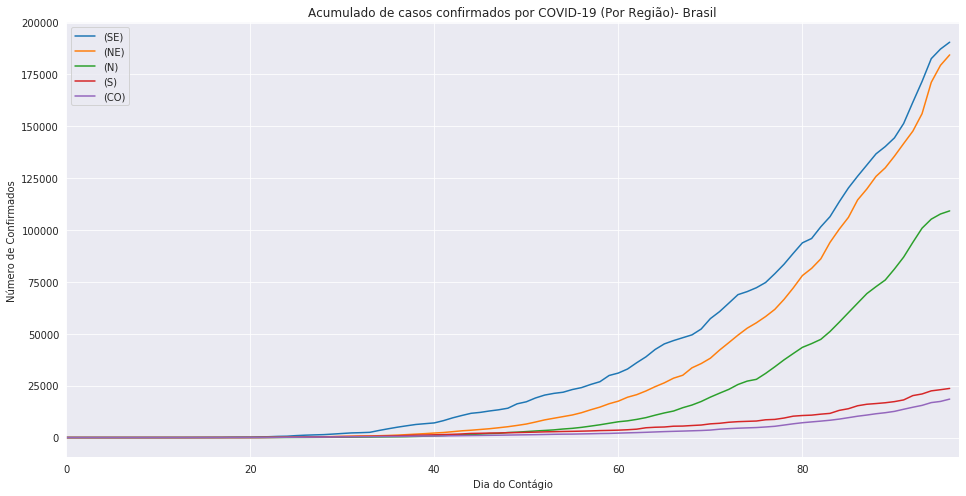

In [425]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in maxconfirmregion.index:
  ax.plot(range(regionbrconfirm.shape[0]), regionbrconfirm[i],label=i)
  ax.set_xlim(0,len(regionbrconfirm.index))
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Confirmados')
plt.title('Acumulado de casos confirmados por COVID-19 (Por Região)- Brasil')
plt.legend()
plt.savefig('cumconfirmregion.png')

In [426]:
regionpercconfirm = pd.DataFrame(np.zeros((regionbrconfirm.shape[0],regionbrconfirm.shape[1])), index = regionbrconfirm.index, columns=regionbrconfirm.columns)

In [427]:
for i in regionbrconfirm.columns:
  for j in range(regionbrconfirm.shape[0]-1):
    if regionbrconfirm[i][j] != 0:
      regionpercconfirm[i][j+1] = ((regionbrconfirm[i][j+1]- regionbrconfirm[i][j])/regionbrconfirm[i][j])

In [428]:
a = pd.DataFrame(regionpercconfirm.T[date].sort_values(ascending = True))
ixmaxconf = a.index

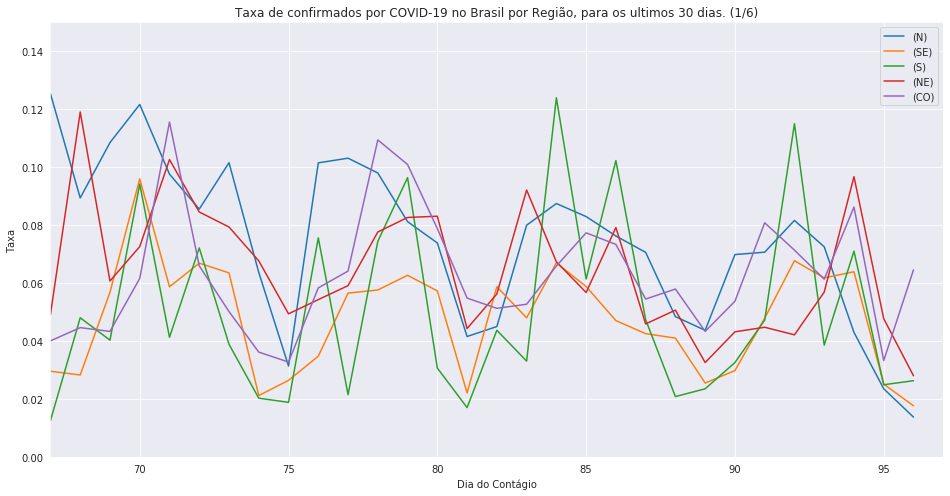

In [429]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in ixmaxconf:
  ax.plot(range(regionpercconfirm.shape[0]), regionpercconfirm[i],label=i)
  ax.set_xlim(regionbrconfirm.shape[0] - days,regionbrconfirm.shape[0])
  ax.set_ylim(0,0.150)
plt.xlabel('Dia do Contágio')
plt.ylabel('Taxa')
plt.title('Taxa de confirmados por COVID-19 no Brasil por Região, para os ultimos {} dias. ({})'.format(days,date))
plt.legend()
plt.savefig('confirmratedaysregion.png')

In [430]:
regionbrconfirm.shape

(97, 5)

In [431]:
idmeanconfirmregion = pd.DataFrame(np.zeros((n_weeks,regionbrconfirm.shape[1])), index = range(n_weeks), columns=regionbrconfirm.columns)
a = 0
for i in regionbrconfirm.columns:
    for j in range(n_weeks):
        idmeanconfirmregion[i][j] = (regionpercconfirm[i][a:(a+7)].mean())
        a = a + 7
    a = 0

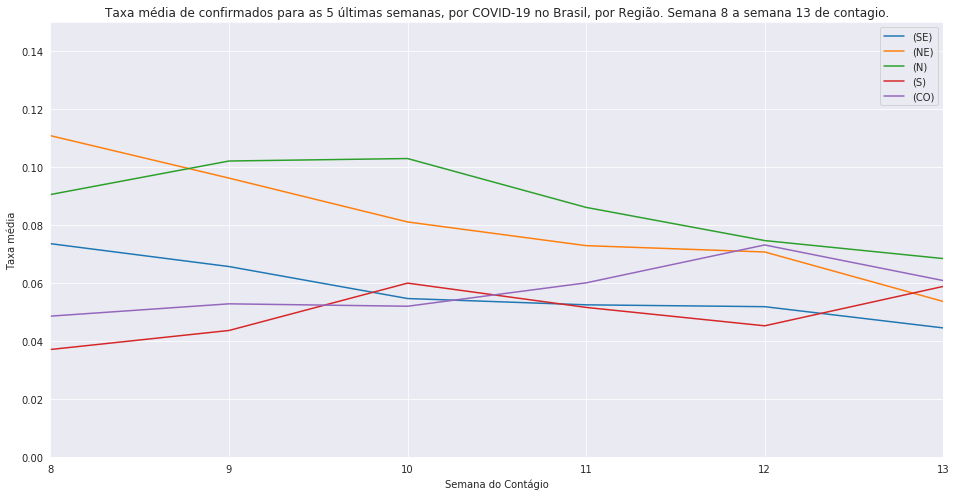

In [432]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in maxconfirmregion.index:
  ax.plot(range(1,idmeanconfirmregion.shape[0]+1), idmeanconfirmregion[i],label=i)
  ax.set_xlim(n_weeks - weeks,n_weeks)
  ax.set_ylim(0,0.150)
plt.xlabel('Semana do Contágio')
plt.ylabel('Taxa média')
plt.title('Taxa média de confirmados para as {} últimas semanas, por COVID-19 no Brasil, por Região. Semana {} a semana {} de contagio.'.format(weeks,n_weeks - weeks,n_weeks))
plt.legend()
plt.savefig('confirmrateweeksregion.png')

### Por Estado

In [433]:
maxconfirmstate = statebrconfirm.T['1/6'].sort_values(ascending=False)[:n]

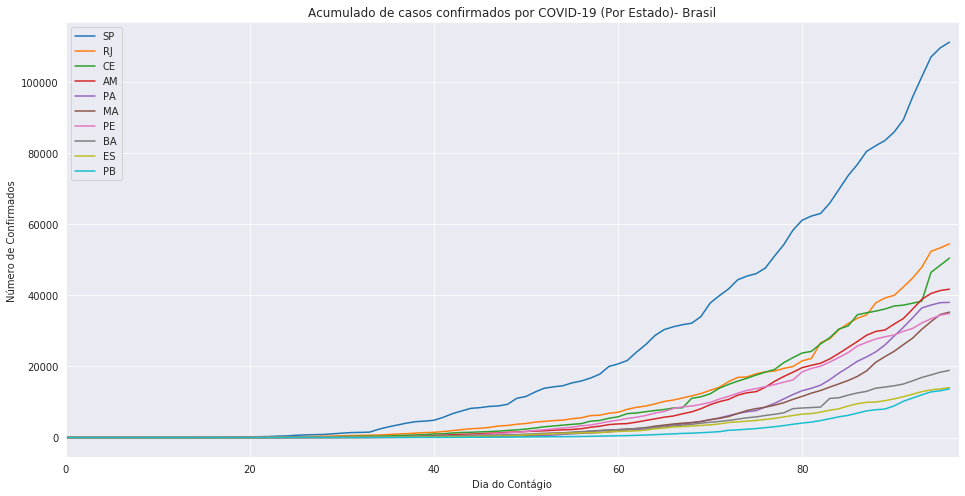

In [434]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in maxconfirmstate.index:
  ax.plot(range(statebrconfirm.shape[0]), statebrconfirm[i],label=i)
  ax.set_xlim(0,len(statebrconfirm.index))
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Confirmados')
plt.title('Acumulado de casos confirmados por COVID-19 (Por Estado)- Brasil')
plt.legend()
plt.savefig('cumconfirmstate.png')

In [435]:
statepercconfirm = pd.DataFrame(np.zeros((statebrconfirm.shape[0],statebrconfirm.shape[1])), index = statebrconfirm.index, columns=statebrconfirm.columns)

In [436]:
for i in statebrconfirm.columns:
  for j in range(statebrconfirm.shape[0]-1):
    if statebrconfirm[i][j] != 0:
      statepercconfirm[i][j+1] = ((statebrconfirm[i][j+1]- statebrconfirm[i][j])/statebrconfirm[i][j])

In [437]:
b = pd.DataFrame(statepercconfirm.T[date].sort_values(ascending = True))
ixmaxconf =  b.T[maxconfirmstate.index].columns

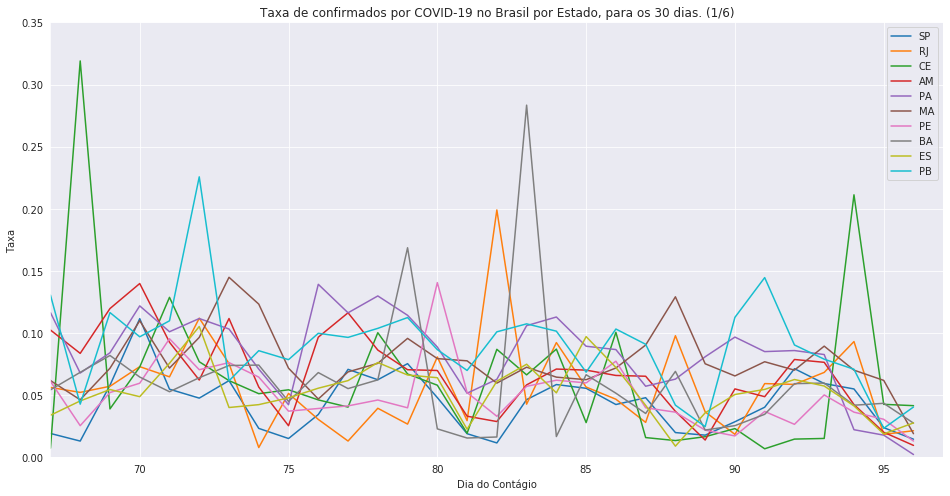

In [438]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in ixmaxconf:
  ax.plot(range(statepercconfirm.shape[0]), statepercconfirm[i],label=i)
  ax.set_xlim(statebrconfirm.shape[0] - 30,statebrconfirm.shape[0])
  ax.set_ylim(0,0.35)
plt.xlabel('Dia do Contágio')
plt.ylabel('Taxa')
plt.title('Taxa de confirmados por COVID-19 no Brasil por Estado, para os {} dias. ({})'.format(30,date))
plt.legend()
plt.savefig('confirmratedaysstate.png')

In [439]:
idmeanconfirmstate = pd.DataFrame(np.zeros((n_weeks,statebrconfirm.shape[1])), index = range(n_weeks), columns=statebrconfirm.columns)
a = 0
for i in statebrconfirm.columns:
    for j in range(n_weeks):
        idmeanconfirmstate[i][j] = (statepercconfirm[i][a:(a+7)].mean())
        a = a + 7
    a = 0

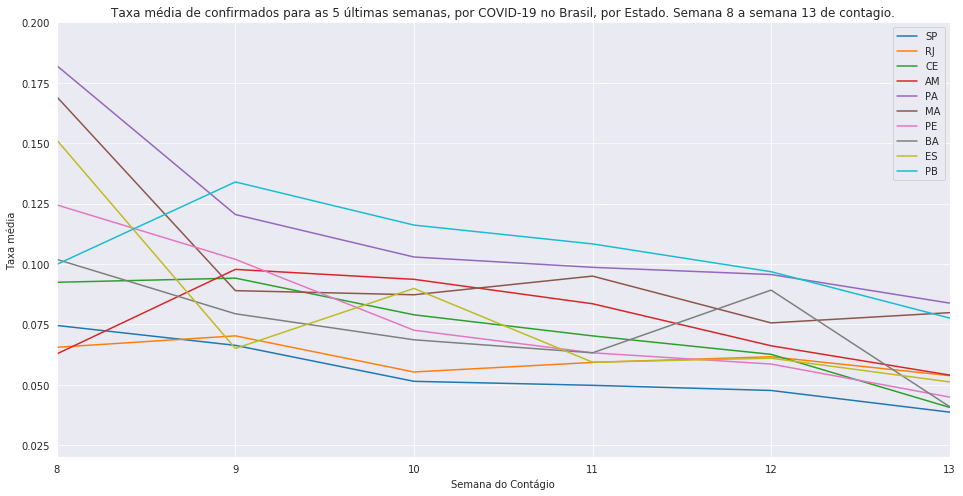

In [440]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in maxconfirmstate.index:
  ax.plot(range(1,idmeanconfirmstate.shape[0]+1), idmeanconfirmstate[i],label=i)
  ax.set_xlim(n_weeks - weeks,n_weeks)
  ax.set_ylim(0.02,0.2)
plt.xlabel('Semana do Contágio')
plt.ylabel('Taxa média')
plt.title('Taxa média de confirmados para as {} últimas semanas, por COVID-19 no Brasil, por Estado. Semana {} a semana {} de contagio.'.format(weeks,n_weeks - weeks,n_weeks))
plt.legend()
plt.savefig('confirmrateweeksstate.png')

## Mortes Brasil (Acumulados)

### Por Região

In [441]:
maxdeathsregion = regionbrdeaths.T[date].sort_values(ascending=False)

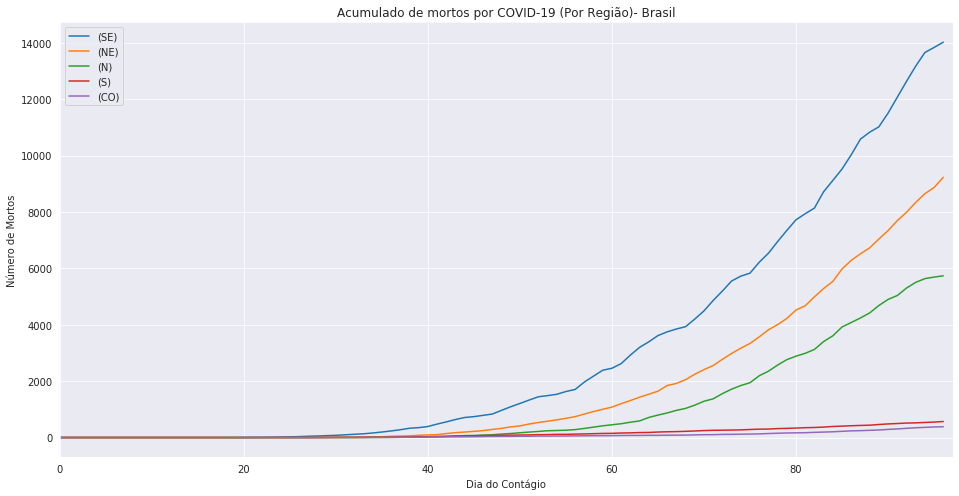

In [442]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in maxconfirmregion.index:
  ax.plot(range(regionbrdeaths.shape[0]), regionbrdeaths[i],label=i)
  ax.set_xlim(0,len(regionbrdeaths.index))
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Mortos')
plt.title('Acumulado de mortos por COVID-19 (Por Região)- Brasil')
plt.legend()
plt.savefig('cumdeathsregion.png')

In [443]:
regionpercdeaths = pd.DataFrame(np.zeros((regionbrdeaths.shape[0],regionbrdeaths.shape[1])), index = regionbrdeaths.index, columns=regionbrdeaths.columns)

In [444]:
for i in regionbrdeaths.columns:
  for j in range(regionbrdeaths.shape[0]-1):
    if regionbrdeaths[i][j] != 0:
      regionpercdeaths[i][j+1] = ((regionbrdeaths[i][j+1]- regionbrdeaths[i][j])/regionbrdeaths[i][j])

In [445]:
a = pd.DataFrame(regionpercdeaths.T[date].sort_values(ascending = True))
ixmaxdeaths = a.index

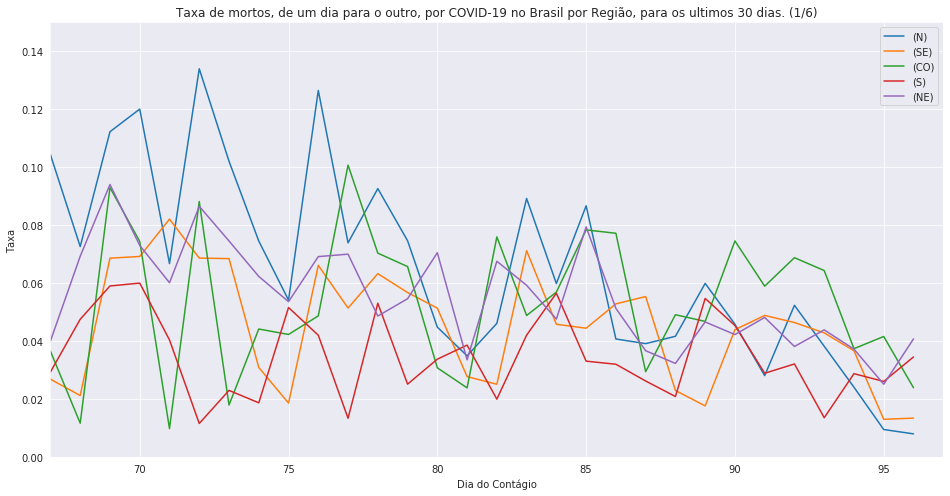

In [446]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in ixmaxdeaths:
  ax.plot(range(regionpercdeaths.shape[0]), regionpercdeaths[i],label=i)
  ax.set_xlim(regionbrdeaths.shape[0] - 30,regionbrdeaths.shape[0])
  ax.set_ylim(0,0.150)
plt.xlabel('Dia do Contágio')
plt.ylabel('Taxa')
plt.title('Taxa de mortos, de um dia para o outro, por COVID-19 no Brasil por Região, para os ultimos {} dias. ({})'.format(30,date))
plt.legend()
plt.savefig('deathsratedaysregion.png')

In [447]:
idmeandeathsregion = pd.DataFrame(np.zeros((n_weeks,regionbrdeaths.shape[1])), index = range(n_weeks), columns=regionbrdeaths.columns)
a = 0
for i in regionbrdeaths.columns:
    for j in range(n_weeks):
        idmeandeathsregion[i][j] = (regionpercdeaths[i][a:(a+7)].mean())
        a = a + 7
    a = 0

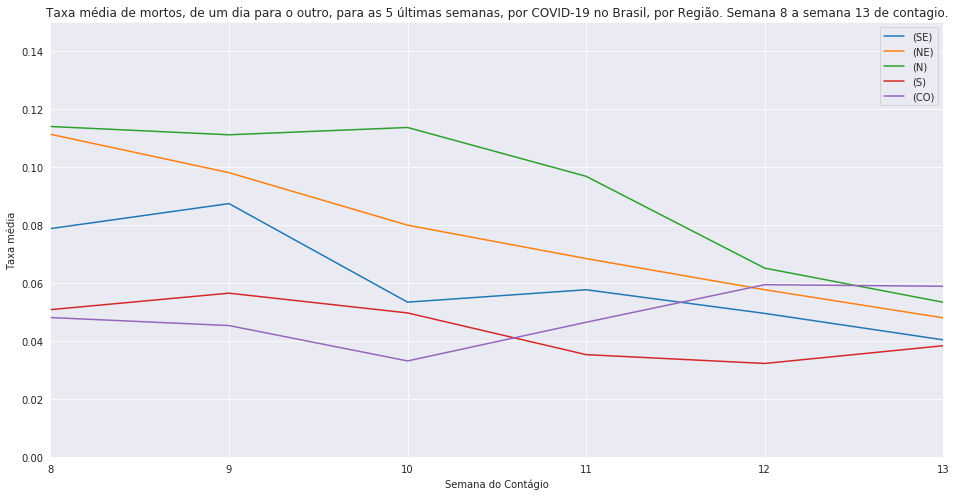

In [448]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in maxdeathsregion.index:
  ax.plot(range(1,idmeandeathsregion.shape[0]+1), idmeandeathsregion[i],label=i)
  ax.set_xlim(n_weeks - weeks,n_weeks)
  ax.set_ylim(0,0.150)
plt.xlabel('Semana do Contágio')
plt.ylabel('Taxa média')
plt.title('Taxa média de mortos, de um dia para o outro, para as {} últimas semanas, por COVID-19 no Brasil, por Região. Semana {} a semana {} de contagio.'.format(weeks,n_weeks - weeks,n_weeks))
plt.legend()
plt.savefig('deathsrateweeksregion.png')

### Por Estado

In [449]:
maxdeathsstate = statebrdeaths.T[date].sort_values(ascending=False)[:n]

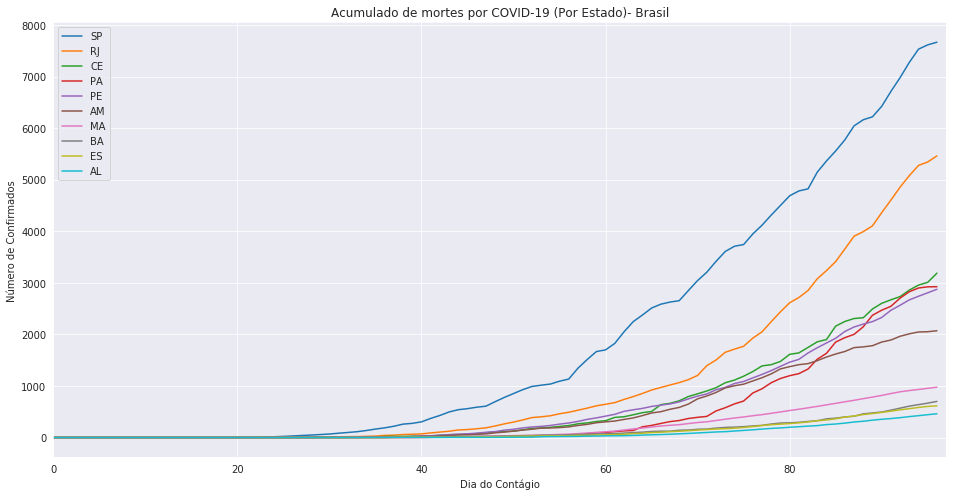

In [450]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in maxdeathsstate.index:
  ax.plot(range(statebrdeaths.shape[0]), statebrdeaths[i],label=i)
  ax.set_xlim(0,len(statebrdeaths.index))
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Confirmados')
plt.title('Acumulado de mortes por COVID-19 (Por Estado)- Brasil')
plt.legend()
plt.savefig('cumdeathsstate.png')

In [451]:
statepercdeaths = pd.DataFrame(np.zeros((statebrdeaths.shape[0],statebrdeaths.shape[1])), index = statebrdeaths.index, columns=statebrdeaths.columns)

In [452]:
for i in statebrdeaths.columns:
  for j in range(statebrdeaths.shape[0]-1):
    if statebrdeaths[i][j] != 0:
      statepercdeaths[i][j+1] = ((statebrdeaths[i][j+1]- statebrdeaths[i][j])/statebrdeaths[i][j])

In [453]:
b = pd.DataFrame(statepercdeaths.T[date].sort_values(ascending = True))
ixmaxdeaths =  b.T[maxdeathsstate.index].columns

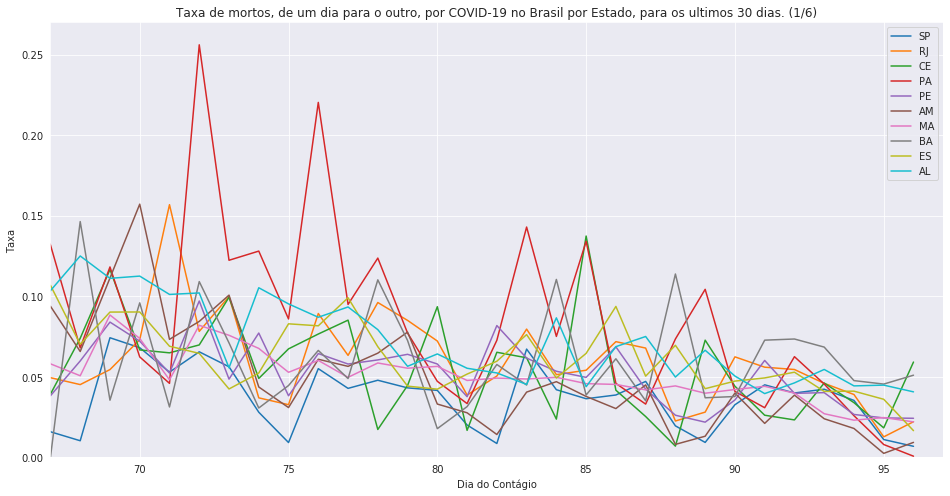

In [454]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in ixmaxdeaths:
  ax.plot(range(statepercdeaths.shape[0]), statepercdeaths[i],label=i)
  ax.set_xlim(statebrdeaths.shape[0] - 30,statebrdeaths.shape[0])
  ax.set_ylim(0,0.27)
plt.xlabel('Dia do Contágio')
plt.ylabel('Taxa')
plt.title('Taxa de mortos, de um dia para o outro, por COVID-19 no Brasil por Estado, para os ultimos {} dias. ({})'.format(30,date))
plt.legend()
plt.savefig('deathsratedaysstate.png')

In [455]:
idmeandeathsstate = pd.DataFrame(np.zeros((n_weeks,statebrdeaths.shape[1])), index = range(n_weeks), columns=statebrdeaths.columns)
a = 0
for i in statebrdeaths.columns:
    for j in range(n_weeks):
        idmeandeathsstate[i][j] = (statepercdeaths[i][a:(a+7)].mean())
        a = a + 7
    a = 0

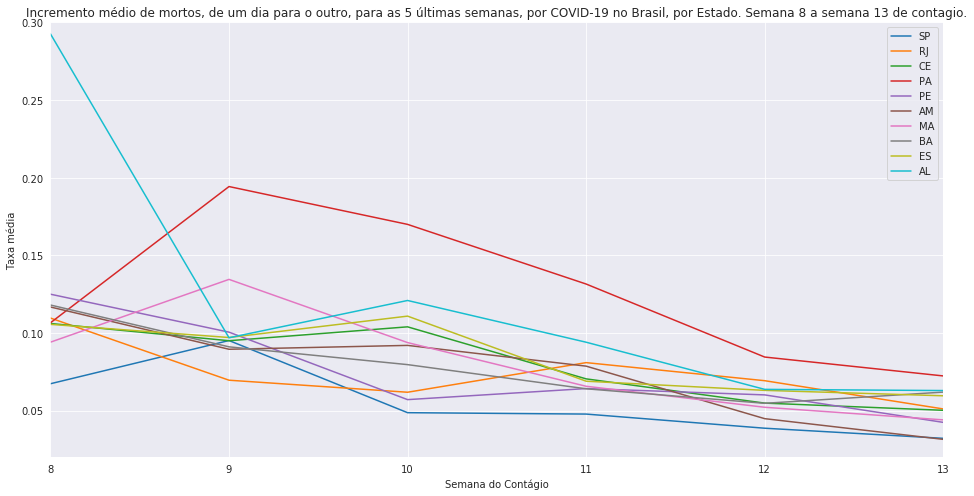

In [456]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
for i in maxdeathsstate.index:
  ax.plot(range(1,idmeandeathsstate.shape[0]+1), idmeandeathsstate[i],label=i)
  ax.set_xlim(n_weeks - weeks,n_weeks)
  ax.set_ylim(0.02,0.3)
plt.xlabel('Semana do Contágio')
plt.ylabel('Taxa média')
plt.title('Incremento médio de mortos, de um dia para o outro, para as {} últimas semanas, por COVID-19 no Brasil, por Estado. Semana {} a semana {} de contagio.'.format(weeks,n_weeks - weeks,n_weeks))
plt.legend()
plt.savefig('deathsrateweeksstate.png')

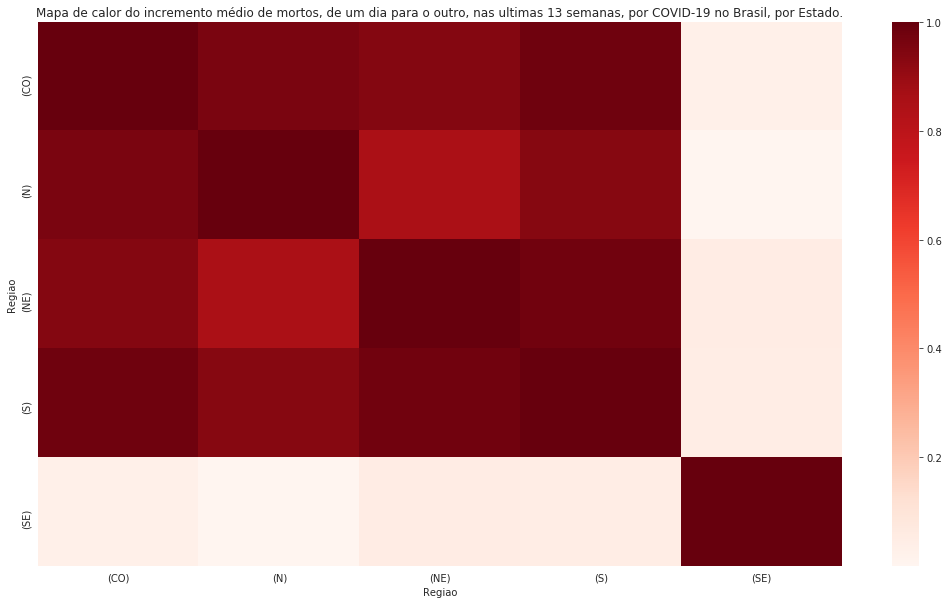

In [457]:
plt.figure(figsize=(18,10))
sns.heatmap(idmeandeathsregion.corr(),cmap='Reds')
plt.title('Mapa de calor do incremento médio de mortos, de um dia para o outro, nas ultimas {} semanas, por COVID-19 no Brasil, por Estado.'.format(n_weeks))
plt.savefig('heatmapregiondeathscorr.png')